In [2]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt

Zadanie 1

In [3]:
u=1.2
d=1/u
R=0.1
S=1

def forwardtree(x,u):
  y = np.empty(x.size+1)
  for i in range(0,len(y)-1):
    y[i]=x[i]*u
  y[-1]=x[-1]/u
  return y
solution=forwardtree(forwardtree(forwardtree(np.ones(1),1.2),1.2),1.2)
solutioncall=solution-1
solutioncall=np.maximum(solutioncall,0)
solutionput=1-solution
solutionput=np.maximum(solutionput,0)
g=((1+R)-d)/(u-d)
def Amcallbackwardtree(x,u,g,R):
  y= np.empty(x.size-1)
  n=len(y)-1
  for i in range(0,len(y)):
    y[i]=max(u**(n-i)*(1/u)**(i)-1,(g*x[i]+(1-g)*x[i+1])/(1+R))
  return y
def eurobackwardtree(x,u,g,R):
  y= np.empty(x.size-1)
  n=len(y)-1
  for i in range(0,len(y)):
    y[i]=(g*x[i]+(1-g)*x[i+1])/(1+R)
  return y
def Amputbackwardtree(x,u,g,R):
  y= np.empty(x.size-1)
  n=len(y)-1
  for i in range(0,len(y)):
    y[i]=max(1-u**(n-i)*(1/u)**(i),(g*x[i]+(1-g)*x[i+1])/(1+R))
  return y
#print("American call option", Amcallbackwardtree(Amcallbackwardtree(Amcallbackwardtree(solutioncall,u,g,R),u,g,R),u,g,R))
#print("European put option", eurobackwardtree(eurobackwardtree(eurobackwardtree(solutionput,u,g,R),u,g,R),u,g,R))
#print("American put option", Amputbackwardtree(Amputbackwardtree(Amputbackwardtree(solutionput,u,g,R),u,g,R),u,g,R))

print("Binomial tree for the American call option")
y=np.ones(1)
print(y)
for i in range(0,3): 
  y=forwardtree(y,1.2)
  print(y)
y=np.maximum(y-1,0)
print(y)
for i in range(0,3):
  y=Amcallbackwardtree(y,u,g,R)
  print(y)
print("Prize of the American call option:",y[0])
americancallprice=y[0]
print("")
print("Binomial tree for the European put option")
y=np.ones(1)
print(y)
for i in range(0,3): 
  y=forwardtree(y,1.2)
  print(y)
y=np.maximum(1-y,0)
print(y)
for i in range(0,3):
  y=eurobackwardtree(y,u,g,R)
  print(y)
print("Prize of the European put option:",y[0])
europeanputprice=y[0]
print("")
print("Binomial tree for the American put option")
y=np.ones(1)
print(y)
for i in range(0,3): 
  y=forwardtree(y,1.2)
  print(y)
y=np.maximum(1-y,0)
print(y)
for i in range(0,3):
  y=Amputbackwardtree(y,u,g,R)
  print(y)
print("Prize of the Amercian put option:",y[0])
americanputprice=y[0]
europeancallprice=(eurobackwardtree(eurobackwardtree(eurobackwardtree(solutioncall,u,g,R),u,g,R),u,g,R))[0]
print("")
print("call-put parity")
print("")
print("c-p:",europeancallprice-europeanputprice)
print("S-X(1+R)^(-N):",S-(1+R)**(-3))
print("difference:",S-(1+R)**(-3)-europeancallprice+europeanputprice)
print("C-P:",americancallprice-americanputprice)
print("We have S-X=0<C-P<S-X(1+R)^(-N)")

Binomial tree for the American call option
[1.]
[1.2        0.83333333]
[1.44       1.         0.69444444]
[1.728      1.2        0.83333333 0.5787037 ]
[0.728 0.2   0.    0.   ]
[0.53090909 0.1322314  0.        ]
[0.38379892 0.08742572]
[0.27542715]
Prize of the American call option: 0.27542715153472014

Binomial tree for the European put option
[1.]
[1.2        0.83333333]
[1.44       1.         0.69444444]
[1.728      1.2        0.83333333 0.5787037 ]
[0.         0.         0.16666667 0.4212963 ]
[0.         0.04132231 0.21464646]
[0.0102452  0.08053867]
[0.02674195]
Prize of the European put option: 0.026741952436297622

Binomial tree for the American put option
[1.]
[1.2        0.83333333]
[1.44       1.         0.69444444]
[1.728      1.2        0.83333333 0.5787037 ]
[0.         0.         0.16666667 0.4212963 ]
[0.         0.04132231 0.30555556]
[0.0102452  0.16666667]
[0.048096]
Prize of the Amercian put option: 0.04809600121023202

call-put parity

c-p: 0.24868519909842252
S-

Zadanie 2

In [4]:
R=0.025
N=12
S=1
X=1
u=1.05
from scipy.special import binom
def binomial(R,N,S,X,u,f):
  sum=0
  d=1/u
  g=((1+R)-d)/(u-d)
  for j in range(0,N+1):
    sum+=1/((1+R)**N)*binom(N,j)*(g**j)*((1-g)**(N-j))*f(S*(u**j)*(d**(N-j))-X)
  return sum
def callf(x):
  return max(x,0)
def binf(x):
  if x>0:
    return 1
  else:
    return 0
def putf(x):
  return max(-x,0)

print("Price of the European binary option", binomial(R,N,S,X,u,binf))
print("Price of the European call option", binomial(R,N,S,X,u,callf))
print("Price of the European put option", binomial(R,N,S,X,u,putf))

Price of the European binary option 0.6985747620532068
Price of the European call option 0.25780749983852475
Price of the European put option 0.001363384883833412


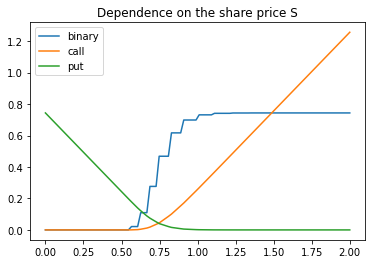

In [5]:
sv=np.linspace(0.0,2,100)
av=np.array([binomial(R,N,x,X,u,binf) for x in sv])
bv=np.array([binomial(R,N,x,X,u,callf) for x in sv])
cv=np.array([binomial(R,N,x,X,u,putf) for x in sv])
a=plt.plot(sv,av,label='binary')
b=plt.plot(sv,bv,label='call')
c=plt.plot(sv,cv,label='put')
plt.title("Dependence on the share price S")
plt.legend()
plt.show()

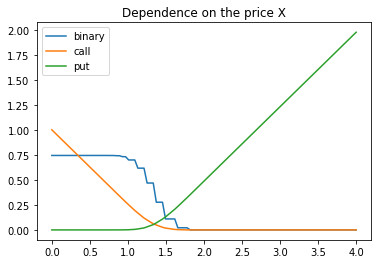

In [6]:
xv=np.linspace(0,4,100)
av=np.array([binomial(R,N,S,x,u,binf) for x in xv])
bv=np.array([binomial(R,N,S,x,u,callf) for x in xv])
cv=np.array([binomial(R,N,S,x,u,putf) for x in xv])
a=plt.plot(xv,av,label='binary')
b=plt.plot(xv,bv,label='call')
c=plt.plot(xv,cv,label='put')
plt.title("Dependence on the price X")
plt.legend()
plt.show()

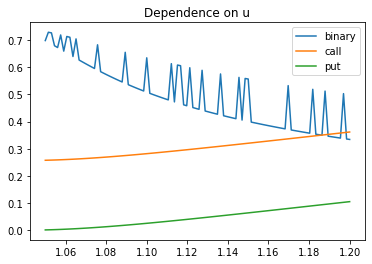

In [7]:
uv=np.linspace(1.05,1.2,100)
av=np.array([binomial(R,N,S,X,x,binf) for x in uv])
bv=np.array([binomial(R,N,S,X,x,callf) for x in uv])
cv=np.array([binomial(R,N,S,X,x,putf) for x in uv])
a=plt.plot(uv,av,label='binary')
b=plt.plot(uv,bv,label='call')
c=plt.plot(uv,cv,label='put')
plt.title("Dependence on u")
plt.legend()
plt.show()

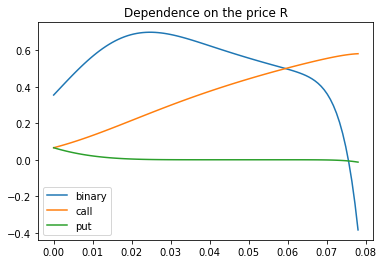

In [8]:
rv=np.linspace(0,0.078,100)
av=np.array([binomial(x,N,S,X,u,binf) for x in rv])
bv=np.array([binomial(x,N,S,X,u,callf) for x in rv])
cv=np.array([binomial(x,N,S,X,u,putf) for x in rv])
a=plt.plot(rv,av,label='binary')
b=plt.plot(rv,bv,label='call')
c=plt.plot(rv,cv,label='put')
plt.title("Dependence on the price R")
plt.legend()
plt.show()

Zadanie 3

---

In [9]:
T=1
X=1
S=1
sigma=0.2
r=0.1
def binomialapprox(N,r,sigma,T,S,X,f):
    R=np.exp(r*T/N)-1
    u=np.exp(sigma*np.sqrt(T/N))
    return binomial(R,N,S,X,u,f)

from scipy.stats import norm
def bseurocall(S,X,T,sigma,r):
  d=(math.log(S/X)+(r+0.5*(sigma**2))*T)/(sigma*math.sqrt(T))
  x1=S*norm.cdf(d)
  x2=X*math.exp(-r*T)*norm.cdf(d-sigma*math.sqrt(T))
  return (x1-x2)

def bseuroput(S,X,T,sigma,r):
  d=(math.log(S/X)+(r+0.5*(sigma**2))*T)/(sigma*math.sqrt(T))
  x1=S*norm.cdf(-d)
  x2=X*math.exp(-r*T)*norm.cdf(-d+sigma*math.sqrt(T))
  return (x2-x1)

eucall=[]
eurocallvalue=bseurocall(S,X,T,sigma,r)
print("European call option")
print("Exact value from Black-Scholes model:",eurocallvalue)
print("")
for i in range (0,100):
    value=binomialapprox((i+1),r,sigma,T,S,X,callf)
    eucall.append(value)
    if ((i+1)%10==0):
        print("value ",value,"for N =",(i+1))
euput=[]
europutvalue=bseuroput(S,X,T,sigma,r)
print("")
print("European put option")
print("Exact value from Black-Scholes model:",europutvalue)
print("")
for i in range (0,100):
    value=binomialapprox((i+1),r,sigma,T,S,X,putf)
    euput.append(value)
    if((i+1)%10==0):
        print("value ",value,"for N =",(i+1))    
print("")
x=np.linspace(1,100,100)

European call option
Exact value from Black-Scholes model: 0.13269676584660894

value  0.13063772112135819 for N = 10
value  0.1316595607533996 for N = 20
value  0.13200370274357284 for N = 30
value  0.13217638783724822 for N = 40
value  0.13228018904376937 for N = 50
value  0.13234946758280364 for N = 60
value  0.1323989898534741 for N = 70
value  0.132436151936557 for N = 80
value  0.13246506777572575 for N = 90
value  0.13248820796590888 for N = 100

European put option
Exact value from Black-Scholes model: 0.03753418388256835

value  0.0354751391573187 for N = 10
value  0.036496978789360965 for N = 20
value  0.03684112077953433 for N = 30
value  0.037013805873204256 for N = 40
value  0.03711760707972748 for N = 50
value  0.03718688561876802 for N = 60
value  0.03723640788943441 for N = 70
value  0.0372735699725126 for N = 80
value  0.03730248581168217 for N = 90
value  0.037325626001864724 for N = 100



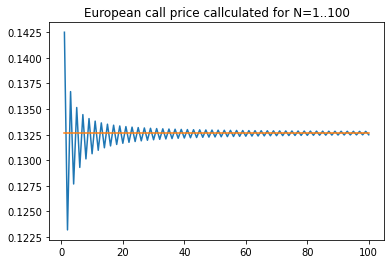

In [10]:
a=plt.plot(x,eucall)
b=plt.plot(x,np.ones(100)*eurocallvalue)
plt.title("European call price callculated for N=1..100")
plt.show()

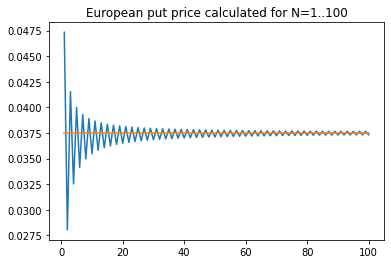

In [11]:
a=plt.plot(x,euput)
b=plt.plot(x,np.ones(100)*europutvalue)
plt.title("European put price calculated for N=1..100")
plt.show()

To calculate values of the American options we restore to methods from the excerice 1. We construct the forward and backward tree (implicitly) and calculate the appropriate return function at each step. We tak N=300

In [12]:
def Americanbinomialcall(N,r,sigma,T,S,X):
    R=np.exp(r*T/N)-1
    u=np.exp(sigma*np.sqrt(T/N))
    d=1/u
    g=((1+R)-d)/(u-d)
    y=np.ones(1)*S
    for i in range(0,N):
        y=forwardtree(y,u)
    y=np.maximum(y-1,0)
    for i in range(0,N):
        y=Amcallbackwardtree(y,u,g,R)
    return y[0]
print("American call option price for N=300:",Americanbinomialcall(300,r,sigma,T,S,X))  
def Americanbinomialput(N,r,sigma,T,S,X):
    R=np.exp(r*T/N)-1
    u=np.exp(sigma*np.sqrt(T/N))
    d=1/u
    g=((1+R)-d)/(u-d)
    y=np.ones(1)*S
    for i in range(0,N):
        y=forwardtree(y,u)
    y=np.maximum(1-y,0)
    for i in range(0,N):
        y=Amputbackwardtree(y,u,g,R)
    return y[0]
print("American put option price for N=300:",Americanbinomialput(300,r,sigma,T,S,X))
print("")
print("The price of the american call option is the same as for european call option.")

American call option price for N=300: 0.13262718789140107
American put option price for N=300: 0.04813402533165827

The price of the american call option is the same as for european call option.


Zadanie 4

----
Black-Scholes equation reads

\begin{equation*}
\frac{\partial V}{\partial S}Sr+\frac{1}{2}\frac{\partial^{2}V}{\partial S^{2}}S^{2}\sigma^2+\frac{\partial V}{\partial t}-rV=0.
\end{equation*}

For the European call option with the excerice price $X$ and expiration time $T$, the final condition for solving the equation is that at maturity $t=T$:

\begin{equation*}
c(T)=V(T)=\max(S(T)-X;0).
\end{equation*}


The solution to the Black-Scholes equation can be written then as

\begin{equation*}
c(t)=S(t)N(d)-Xe^{-r(T-t)}N(d-\sigma (T-t)^{1/2}).
\end{equation*}


In [19]:
S=1
X=1
T=1
sigma = 0.2
r= 0.1
from scipy.stats import norm
def bseurocall(S,X,T,sigma,r):
  d=(math.log(S/X)+(r+0.5*(sigma**2))*T)/(sigma*math.sqrt(T))
  x1=S*norm.cdf(d)
  x2=X*math.exp(-r*T)*norm.cdf(d-sigma*math.sqrt(T))
  return (x1-x2)

def bseurobincall(S,X,T,sigma,r):
  d=(math.log(S/X)+(r+0.5*(sigma**2))*T)/(sigma*math.sqrt(T))
  x2=math.exp(-r*T)*norm.cdf(d-sigma*math.sqrt(T))
  return x2

def mceurocall(X,T, N, m, sigma,r):
  dt = T/N
  x=norm.rvs(size=(N,m),scale=sigma*math.sqrt(dt))
  x+=(r-0.5*(sigma**2))*dt
  x=np.sum(x,axis=0)
  y=np.array([np.exp(xi) for xi in x])
  y-=1
  y[y<0]=0
  y*=np.exp(-r*T)
  return [np.mean(y),np.std(y)]

def mceurobincall(X,T, N, m, sigma,r):
  dt = T/N
  x=norm.rvs(size=(N,m),scale=sigma*math.sqrt(dt))
  x+=(r-0.5*(sigma**2))*dt
  x=np.sum(x,axis=0)
  y=np.array([np.exp(xi) for xi in x])
  y-=1
  y[y<0]=0
  y[y>0]=1
  y*=np.exp(-r*T)
  return [np.mean(y),np.std(y)]

def mceurosincall(X,T, N, m, sigma,r):
  dt = T/N
  x=norm.rvs(size=(N,m),scale=sigma*math.sqrt(dt))
  x+=(r-0.5*(sigma**2))*dt
  x=np.sum(x,axis=0)
  y=np.array([np.exp(xi) for xi in x])
  y[y>np.pi]=0
  y=np.array([np.sin(yi) for yi in y])
  y*=np.exp(-r*T)
  return [np.mean(y),np.std(y)]  

def mcasiancall(X,T, N, m, sigma,r):
  dt = T/N
  x=norm.rvs(size=(N,m),scale=sigma*math.sqrt(dt))
  x+=(r-0.5*(sigma**2))*dt
  x=np.cumsum(x,axis=0)
  y=np.array([np.exp(xi) for xi in x])
  x=np.mean(x,axis=0)
  y-=1
  y[y<0]=0
  y*=np.exp(-r*T)
  return np.mean(y)

print("Price of european call option and standard deviation for m=1000 trajectories:",mceurocall(X,T,250,1000,sigma,r))
print("Price of european call option and standard deviation for m=10 000 trajectories:",mceurocall(X,T,250,10000,sigma,r))
print("Price of european call option and standard deviation for m=100 000 trajectories:",mceurocall(X,T,250,100000,sigma,r))
print("Price of european call option calculated using analytical result", bseurocall(S,X,T,sigma,r))
print("")
print("Price of the european binary call option for m = 100 000 trajectories", mceurobincall(X,T,250,100000,sigma,r)[0])
print("Price of the european binary call option calculated analytically",bseurobincall(S,X,T,sigma,r))
print("")
print("Price of the sinusoidal european  option for m=100 000 trajectories", mceurosincall(X,T,250,100000,sigma,r)[0])
print("")
print("Price of the asian call option for m=100 000 trajectories", mcasiancall(X,T,250,100000,sigma,r))

Price of european call option and standard deviation for m=1000 trajectories: [0.13792635030448197, 0.16259737946611863]
Price of european call option and standard deviation for m=10 000 trajectories: [0.13432911393393973, 0.1624698829636064]
Price of european call option and standard deviation for m=100 000 trajectories: [0.13207254438794655, 0.1606236688066865]
Price of european call option calculated using analytical result 0.13269676584660894

Price of the european binary call option for m = 100 000 trajectories 0.5902887864041189
Price of the european binary call option calculated analytically 0.5930501164033175

Price of the sinusoidal european  option for m=100 000 trajectories 0.7880063830443431

Price of the asian call option for m=100 000 trajectories 0.07653849099122997
